<a href="https://colab.research.google.com/github/JakeOh/202011_itw_pyml_wkd/blob/main/ml02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST(Modified National Institute of Science and Technology) 데이터 셋

* 손글씨 숫자(0, 1, 2, ..., 9) 데이터
* 분류 알고리즘을 테스트할 때 가장 많이 사용되는 데이터 셋

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# scikit-learn 패키지에서 예제로 제공하는 MNIST 데이터 셋을 다운로드
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [5]:
print(mnist['DESCR'])  # mnist 데이터 셋에 대한 설명

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [6]:
X, y = mnist['data'], mnist['target']
# X: 손글씨 이미지 데이터
# y: 손글씨 이미지 레이블(정답)

In [7]:
X.shape, y.shape
#> X: 2-d array, y: 1-d array

((70000, 784), (70000,))

In [ ]:
X[0]  # X의 첫번째 row의 모든 컬럼(특성) 데이터: 0 ~ 255

In [9]:
y[0]  #> 문자열(str) 타입

'5'

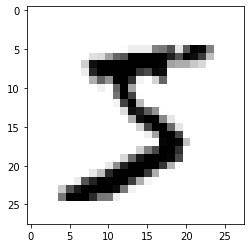

In [11]:
img = X[0].reshape((28, 28))
plt.imshow(img, cmap=plt.cm.binary)
plt.show()

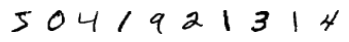

In [13]:
# 데이터 셋 X의 첫 10개 이미지를 출력
fig, ax = plt.subplots(nrows=1, ncols=10)
for i in range(10):
    img = X[i].reshape((28, 28))  # 784 -> 28x28 변환
    ax[i].imshow(img, cmap=plt.cm.binary)  # i번째 subplot에 이미지를 그림
    ax[i].axis('off')  # 축 (레이블)을 제거

plt.show()

In [14]:
# 레이블(타켓) y의 첫 10개 값을 출력
y[:10]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4'], dtype=object)

In [15]:
# 레이블(타겟) y는 문자열 타입 -> 숫자로 변환
y = y.astype(np.int16)  # 16bit(=2byte) 정수
y[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=int16)

In [17]:
# train/test 셋 분리
n = 60_000  # 훈련 셋의 데이터 개수
X_train, y_train = X[:n], y[:n]  # 0 <= i < 60_000
X_test, y_test = X[n:], y[n:]  # 60_000 <= i < 70_000
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

# 2진 분류기(Binary classifier)

* 양성/음성
* 스팸/스팸X

In [18]:
# 5와 5가 아닌 숫자를 분류하는 문제
y_train_5 = (y_train == 5)  # 5는 True, 다른 숫자는 False
y_test_5 = (y_test == 5)

In [19]:
y_train_5[:10]

array([ True, False, False, False, False, False, False, False, False,
       False])

In [20]:
# 분류 알고리즘(모델) 선택
from sklearn.linear_model import SGDClassifier

In [21]:
# 머신러닝 모델 객체 생성
sgd_clf = SGDClassifier(random_state=1)

In [22]:
# 모델 훈련
sgd_clf.fit(X=X_train, y=y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=1, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [23]:
# 훈련된 모델이 훈련 셋을 어떻게 예측하는 지.
y_train_5_pred = sgd_clf.predict(X=X_train)
y_train_5_pred[:10]

array([ True, False, False, False, False, False, False, False, False,
       False])

In [24]:
# 정확도(accuracy): 실제값과 예측값이 얼마나 같으냐
np.mean(y_train_5 == y_train_5_pred)

0.9685333333333334

# 분류(classification)의 평가 지표(metrics)

In [25]:
# 오차 행렬, 혼동 행렬(confusion matrix)
from sklearn.metrics import confusion_matrix

In [27]:
conf_mat = confusion_matrix(y_true=y_train_5,       # 실제 값(레이블)
                            y_pred=y_train_5_pred)  # 예측 값
conf_mat

array([[53381,  1198],
       [  690,  4731]])

* TN(True Negative, 진음성): 실제 음성을 음성으로 예측
* FP(False Positive, 가양성): 실제 음성을 양성으로 잘못 예측
* FN(False Negative, 가음성): 실제 양성을 음성으로 잘못 예측
* TP(True Positive, 진양성): 실제 양성을 양성으로 예측

In [28]:
tn, fp = conf_mat[0, 0], conf_mat[0, 1]
fn, tp = conf_mat[1, 0], conf_mat[1, 1]

In [29]:
# 정확도(accuracy): 전체 샘플들을 정확히 분류한 비율.
accuracy = (tn + tp) / (tn + fp + fn + tp)
accuracy

0.9685333333333334

In [31]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_true=y_train_5, y_pred=y_train_5_pred)
acc

0.9685333333333334

In [32]:
# 정밀도(precision): 양성(positive) 예측들 중에서 정답의 비율
precision = tp / (fp + tp)
precision

0.7979423174228369

In [34]:
from sklearn.metrics import precision_score

precision = precision_score(y_true=y_train_5, y_pred=y_train_5_pred)
precision

0.7979423174228369

In [35]:
# 재현율(recall), 민감도(sensitivity), TPR(True Positive Rate, 진양성 비율)
# 실제 양성 샘플들 중에서 정답의 비율
recall = tp / (fn + tp)
recall

0.8727172108467073

In [36]:
from sklearn.metrics import recall_score

recall = recall_score(y_true=y_train_5, y_pred=y_train_5_pred)
recall

0.8727172108467073

In [38]:
# F1 score: 정밀도와 재현율의 조화 평균
f1 = 2 / (1/precision + 1/recall)
f1

0.8336563876651982

In [40]:
from sklearn.metrics import f1_score

f1 = f1_score(y_true=y_train_5, y_pred=y_train_5_pred)
f1

0.8336563876651982

* 정밀도/재현율 트레이드오프(precsion/recall trade-off)
    * 일반적으로 정밀도 좋아지면, 재현율은 나빠짐.

In [41]:
from sklearn.model_selection import cross_val_predict

In [42]:
predictions = cross_val_predict(estimator=SGDClassifier(random_state=1),  # 머신러닝 모델
                                X=X_train,  # 훈련 셋
                                y=y_train_5,  # 훈련 레이블(타겟)
                                cv=3,  # 교차 검증 횟수(fold)
                                method='predict')  # 예측값 리턴
predictions

array([ True, False, False, ...,  True, False, False])

In [43]:
pred_scores = cross_val_predict(estimator=SGDClassifier(random_state=1),
                                X=X_train,
                                y=y_train_5,
                                cv=3,
                                method='decision_function')
pred_scores

array([  8536.87948485,  -9930.42427547, -34430.63925683, ...,
         6041.93526298,  -4785.17366605,  -8938.21271251])

In [44]:
# 정밀도/재현율 곡선
from sklearn.metrics import precision_recall_curve

In [45]:
precisions, recalls, thresholds = \
        precision_recall_curve(y_true=y_train_5,
                               probas_pred=pred_scores)

len(precisions), len(recalls), len(thresholds)

(59586, 59586, 59585)

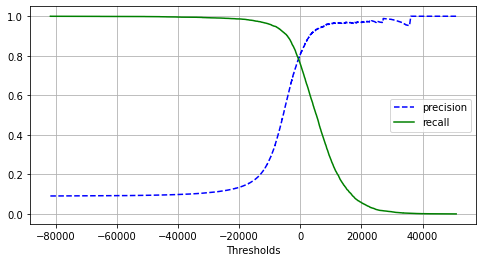

In [54]:
# precision/recall vs threshold 그래프
# threshold의 값에 따른 정밀도와 재현율의 변화
plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
# 'b--': color=blue, linestyle=dashed
plt.plot(thresholds, recalls[:-1], 'g-', label='recall')
# 'g-': color=green, linestyle=solid

plt.grid()
plt.legend()  # 범례 보여주기
plt.xlabel('Thresholds')
plt.show()

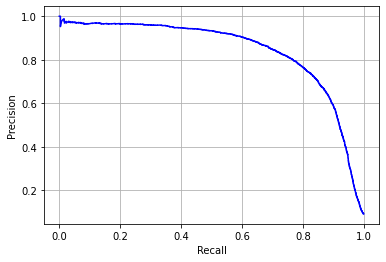

In [56]:
# Precsion vs Recall curve
plt.plot(recalls, precisions, 'b-')
# plt.axhline(y=0.9, c='red', ls='dashed')

plt.grid(True)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC(Receiver Operating Characteristic) Curve

* FPR(False Positive Rate, 가양성 비율)에 대한 TPR(True Posite Rate, 진양성 비율) 곡선
* TPR = Recall = TP / (FN + TP): 실제 양성 샘플들 중에서 양성 예측(정답)의 비율
* TNR = TN / (TN + FP): 실제 음성 샘플들 중에서 음성 예측(정답)의 비율
* FPR = 1 - TNR = FP / (TN + FP): 실제 음성 샘플들 중에서 양성 예측(오답)의 비율

In [57]:
from sklearn.metrics import roc_curve

In [58]:
fpr, tpr, thresholds = roc_curve(y_true=y_train_5, 
                                 y_score=pred_scores)

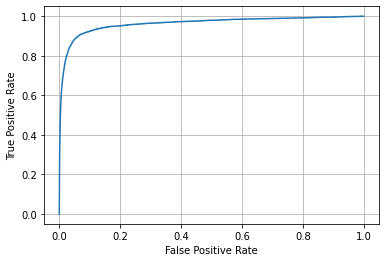

In [61]:
plt.plot(fpr, tpr)

plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [62]:
# AUC(Area Under the Curve): ROC 곡선 아래 넓이
# AUC 1에 가까울 수록 좋은 모델
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true=y_train_5, y_score=pred_scores)

0.962647024223004

* PR 곡선: 양성 클래스가 드물거나 가음성(FN)보다 가양성(FP)가 중요할 때 보통 사용.
* ROC 곡선: 그렇지 않은 경우에는 일반적으로 roc를 사용.

In [63]:
# SGC 분류기와 랜덤 포레스트 분류기와 비교
from sklearn.ensemble import RandomForestClassifier

In [64]:
forest_clf = RandomForestClassifier(random_state=1)

In [65]:
forest_pred_scores = cross_val_predict(estimator=forest_clf,
                                       X=X_train,
                                       y=y_train_5,
                                       cv=3,
                                       method='predict_proba')

In [66]:
forest_pred_scores
# 60,000개 훈련 셋의 [prob(negative), prob(positive)]

array([[0.07, 0.93],
       [0.98, 0.02],
       [0.96, 0.04],
       ...,
       [0.  , 1.  ],
       [0.92, 0.08],
       [0.94, 0.06]])

In [67]:
forest_pred_scores.shape

(60000, 2)

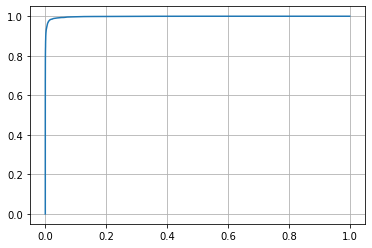

In [69]:
# Random Forest의 ROC 곡선
forest_fpr, forest_tpr, _ = roc_curve(y_true=y_train_5,
                                      y_score=forest_pred_scores[:, 1])

plt.plot(forest_fpr, forest_tpr)
plt.grid()
plt.show()

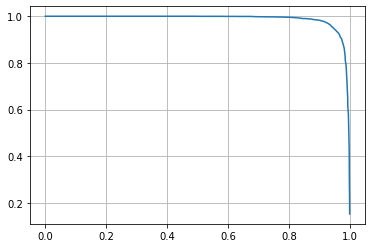

In [70]:
# Random Forest의 PR 곡선
forest_prec, forest_rec, _ = \
        precision_recall_curve(y_true=y_train_5, 
                               probas_pred=forest_pred_scores[:, 1])
        
plt.plot(forest_rec, forest_prec)
plt.grid()
plt.show()